In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(seed=40)

# Постановка проблемы

Предположим, к нам попали данные исследований нескольких (пусть n=3) вакцин;  
В каждом исследовании собирались данные о респондентах, с которых через 1 / 10 / 100 часов собирали оценку самочувствия  

In [ ]:
respondents = 1000

def make_research():
  research = {
      "gender": np.random.randint(0,2,respondents),            # 0 - m, 1 - f
      "age": np.random.normal(25.0,20.0,respondents),
      "height": np.random.normal(170.0,15.5,respondents),
      "weight": np.random.normal(65.0,25.0,respondents)
      }

  feeled_bad = 0                                                # считаем, сколько всего людей ощутили себя плохо

  part = np.random.randint(7,20,1)                              # доля респондентов, которые будут подвержены плохому самочувствию
  feeled_bad += part

  research["condition_after_1"] = np.random.normal(
      (5 *                                                      # мат. ожидание сдвигается: если бы исследования и не было, в среднем все ставили бы ровно 5,
       (respondents * (1 - part/100)) +                         # но теперь 5 в среднем поставят меньшее число людей
       1 * (respondents * part/100))                            # остальные захотят поставить 1
      / respondents,

      2.0,
      respondents
      )
  research["condition_after_1"]=np.clip(research["condition_after_1"], 0, 10) #почистили данные. теперь отрицательные значения заменены на нижнюю границу
                                                                              #распределения, а значения выше 10 - на 10.

  got_better = 1 if np.random.randint(0,10,1) > 7 else -1       # будем считать, что люди более склонны иметь ухудшившееся самочувствие через какое-то время
  part = np.random.randint(
      7 - (got_better * 2),
      20 - (got_better * 5),
      1)
  feeled_bad += part

  research["condition_after_10"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      1.0,
      respondents
      )
  research["condition_after_10"]=np.clip(research["condition_after_10"], 0, 10) #почистили данные. теперь отрицательные значения заменены на нижнюю границу
                                                                                #распределения, а значения выше 10 - на 10.

  got_better = 1 if np.random.randint(0,10,1) > 3 else -1       # будем считать, что люди более склонны иметь улучшившееся самочувствие через продолжительное время
  part = np.random.randint(
      7 - (got_better * 3),
      20 - (got_better * 7),
      1)
  feeled_bad += part

  research["condition_after_100"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      2.5,
      respondents
      )
  research["condition_after_100"]=np.clip(research["condition_after_100"], 0, 10) #почистили данные. теперь отрицательные значения заменены на нижнюю границу
                                                                                  #распределения, а значения выше 10 - на 10.

  return research

In [ ]:
researh_0 = make_research()

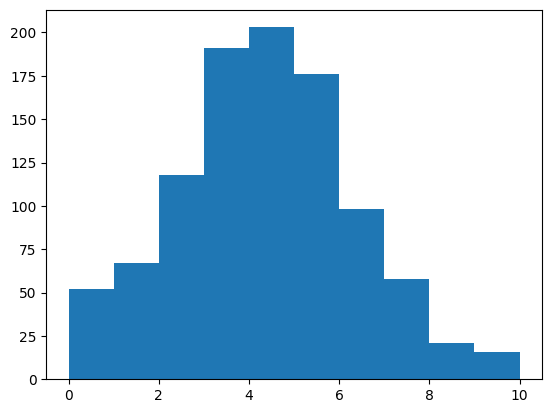

In [ ]:
_ =plt.hist(researh_0["condition_after_1"])

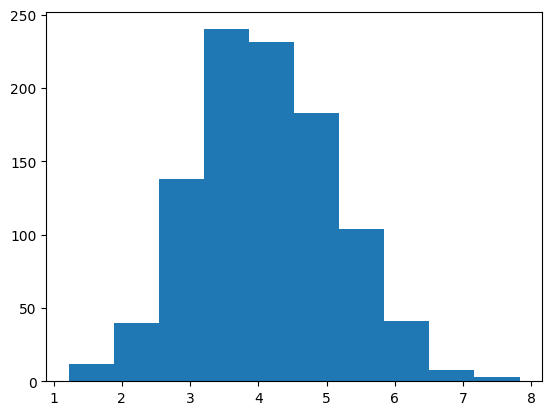

In [ ]:
_ =plt.hist(researh_0["condition_after_10"])

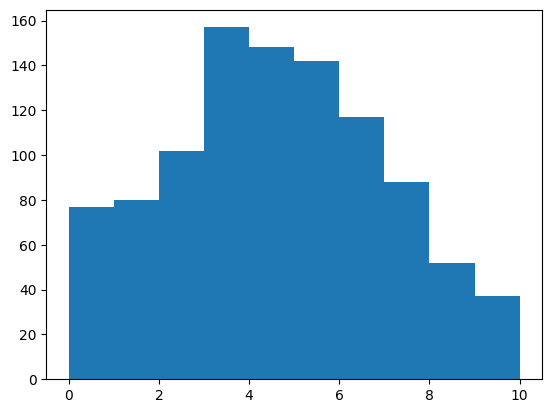

In [ ]:
_ =plt.hist(researh_0["condition_after_100"])

In [ ]:
mean1 = np.mean(researh_0["condition_after_1"])
mean2 = np.mean(researh_0["condition_after_10"])
mean3 = np.mean(researh_0["condition_after_100"])

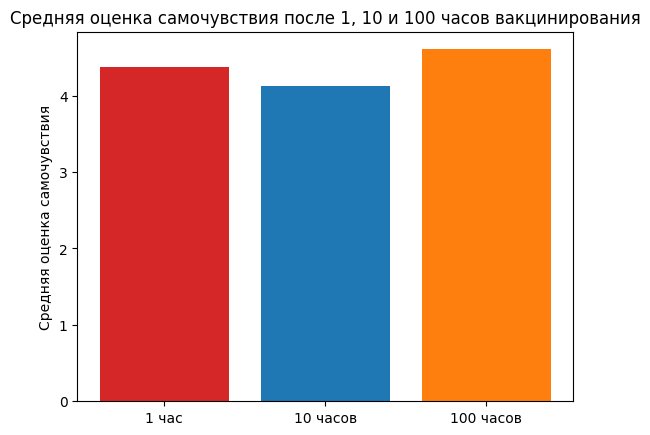

In [ ]:
fig, ax = plt.subplots()

names = ['1 час', '10 часов', '100 часов']
counts = [mean1, mean2, mean3]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(names, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Средняя оценка самочувствия')
ax.set_title('Средняя оценка самочувствия после 1, 10 и 100 часов вакцинирования')

plt.show()

# Задание

Мы хотим:
- проверить, что с данными все в порядке (т.к. данные генерили с помощью распределений, у нас могут быть отрицательные числа, которые надо исправить на 0, а также числа больше 10, которые надо исправить на 10) - построить гистограммы и почистить данные
- сравнить между собой результаты исследований разных вакцин и каким-либо образом представить сравнение исследований (т.е., к примеру, показать в одном пространстве сразу 3 исследования, пользуясь признаками "средняя оценка самочувствия после 1 часа", "средняя оценка самочувствия после 10 часов", "средняя оценка самочувствия после 100 часов"
- важно! обратите внимание на цвета, что вы используете